In [21]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
p_file = '../data/08_allele_specifics/ASTS_results_pantrx.tsv'
g_file = '../data/08_allele_specifics/ASTS_results_gencode.tsv'

In [28]:
p_df = pd.read_csv(p_file, sep='\t')
p_df = p_df.loc[p_df.significant=='FDR<0.05']

In [29]:
g_df = pd.read_csv(g_file, sep='\t')
g_df = g_df.loc[g_df.significant=='FDR<0.05']

## Do ASTS genes have more than one event?

In [17]:
p_df.loc[(p_df['geneid.v']=='ENSG00000008988.11')&(p_df['sample']=='CEU1')]

,cell_line_id,sample,population,map_reads_assemblymap,gene_variant,statistic,p.value,FDR,geneid.v,variant,transcriptid.v,refCount,altCount,totalCount,transcript_variant,significant,tested_genes,significant_genes
37646,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365772,443,373,816,transcript_365772_chr8_56073255_T_C,FDR<0.05,220,34
37647,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365747,416,350,766,transcript_365747_chr8_56073255_T_C,FDR<0.05,220,34
37648,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365741,641,336,977,transcript_365741_chr8_56073255_T_C,FDR<0.05,220,34
37649,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365799,446,366,812,transcript_365799_chr8_56073255_T_C,FDR<0.05,220,34
37650,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365784,212,175,387,transcript_365784_chr8_56073255_T_C,FDR<0.05,220,34
37651,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365738,186,101,287,transcript_365738_chr8_56073255_T_C,FDR<0.05,220,34
37652,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365673,319,250,569,transcript_365673_chr8_56073255_T_C,FDR<0.05,220,34
37653,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365810,500,416,916,transcript_365810_chr8_56073255_T_C,FDR<0.05,220,34
37654,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365646,91,91,182,transcript_365646_chr8_56073255_T_C,FDR<0.05,220,34
37655,GM12273,CEU1,CEU,12692969,ENSG00000008988.11_chr8_56073255_T_C,72.065462,0.0005,0.002459,ENSG00000008988.11,chr8_56073255_T_C,transcript_365800,115,100,215,transcript_365800_chr8_56073255_T_C,FDR<0.05,220,34


In [18]:
# tested on the level of sample + gene so groupby that
temp = p_df[['sample', 'population', 'geneid.v', 'variant', 'significant']]
temp = temp.groupby(['sample', 'population', 'geneid.v', 'significant']).nunique().rename({'variant':'n_var'}, axis=1).reset_index()
temp.head()

,sample,population,geneid.v,significant,n_var
0,CEU1,CEU,ENSG00000008988.11,FDR<0.05,1
1,CEU1,CEU,ENSG00000035141.10,FDR<0.05,1
2,CEU1,CEU,ENSG00000089063.16,FDR<0.05,1
3,CEU1,CEU,ENSG00000103811.18,FDR<0.05,1
4,CEU1,CEU,ENSG00000105640.13,FDR<0.05,3


In [19]:
# tested on the level of sample + gene so groupby that
temp = p_df[['population', 'geneid.v', 'variant', 'significant']]
temp = temp.groupby(['population', 'geneid.v', 'significant']).nunique().rename({'variant':'n_var'}, axis=1).reset_index()
temp.head()

,population,geneid.v,significant,n_var
0,CEU,ENSG00000008988.11,FDR<0.05,1
1,CEU,ENSG00000035141.10,FDR<0.05,1
2,CEU,ENSG00000037241.7,FDR<0.05,1
3,CEU,ENSG00000051523.12,FDR<0.05,1
4,CEU,ENSG00000062582.14,FDR<0.05,1


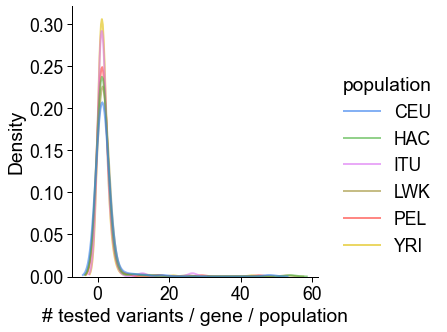

In [24]:
# plot this dist of # sig ASTS / gene
init_plot_settings(aspect='square')
# are taus higher / lower for differnet pop spec transcripts 
# depending on the pop?
c_dict, order = get_population_colors()
ax = sns.displot(temp, kind='kde', 
            palette=c_dict, 
            hue='population', 
            x='n_var',
            common_norm=False, 
            linewidth=2,
            alpha=0.6)
xlabel = '# tested variants / gene / population'
ax.set(xlabel=xlabel)

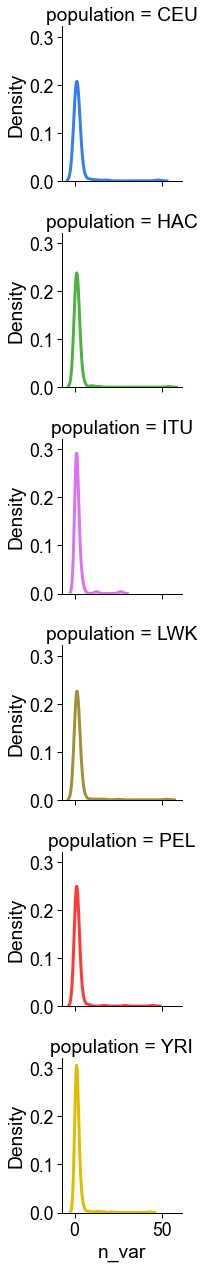

In [26]:
init_plot_settings('square')
g = sns.FacetGrid(temp, row='population')
g.map_dataframe(sns.kdeplot, x='n_var',
                hue='population', palette=c_dict,
                linewidth=3)

## How many variants are sig. per gene in v47 vs. PODER?

In [36]:
# tested on the level of sample + gene so groupby that
temp = p_df[['population', 'geneid.v', 'variant', 'significant']]
temp = temp.groupby(['population', 'geneid.v', 'significant']).nunique().rename({'variant':'n_var'}, axis=1).reset_index()

In [37]:
# tested on the level of sample + gene so groupby that
temp2 = g_df[['population', 'geneid.v', 'variant', 'significant']]
temp2 = temp2.groupby(['population', 'geneid.v', 'significant']).nunique().rename({'variant':'n_var'}, axis=1).reset_index()

In [38]:
# merge by gene and population and plot n_var in each thing
temp = temp.merge(temp2, how='outer',
                  suffixes=('_PODER', '_v47'),
                  on=['population', 'geneid.v'])
n_var_cols = [c for c in temp.columns if 'n_var' in c]
temp[n_var_cols] = temp[n_var_cols].fillna(0)
temp.head()

,population,geneid.v,significant_PODER,n_var_PODER,significant_v47,n_var_v47
0,CEU,ENSG00000008988.11,FDR<0.05,1.0,NaN,0.0
1,CEU,ENSG00000035141.10,FDR<0.05,1.0,NaN,0.0
2,CEU,ENSG00000037241.7,FDR<0.05,1.0,NaN,0.0
3,CEU,ENSG00000051523.12,FDR<0.05,1.0,FDR<0.05,1.0
4,CEU,ENSG00000062582.14,FDR<0.05,1.0,FDR<0.05,1.0


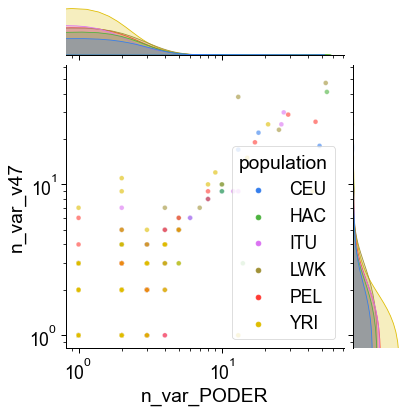

In [41]:
g = sns.jointplot(temp, 
              x='n_var_PODER',
              y='n_var_v47',
              hue='population',
              palette=c_dict,
              joint_kws={'alpha':0.6})
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

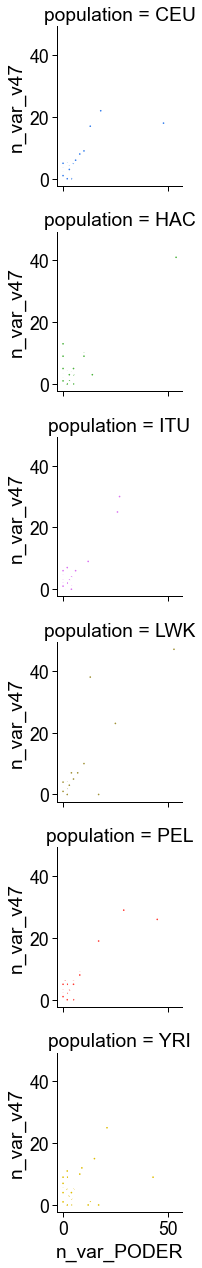

In [42]:
init_plot_settings('square')
g = sns.FacetGrid(temp, row='population')
g.map_dataframe(sns.scatterplot, x='n_var_PODER', y='n_var_v47',
                hue='population', palette=c_dict,
                linewidth=3)